## 위경도 기반 최단 거리 측정 ##

In [9]:
pip install osmnx networkx folium #모듈 설치
pip install geopy #모듈 설치

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc('font', family='AppleGothic') # For MacOS
plt.rcParams['axes.unicode_minus'] = False #이걸로 해야 한글이 안깨임

## 여러개의 Dot 중 가장 가까운 Dot를 찾고 거리 계산 ##

최적의 거리를 가진 행 쌍: (1, 2)
최적의 거리: 2.5252184555727664 킬로미터
최적의 거리를 가진 두 지점의 점포명: 광화문시대점, 동대사랑점


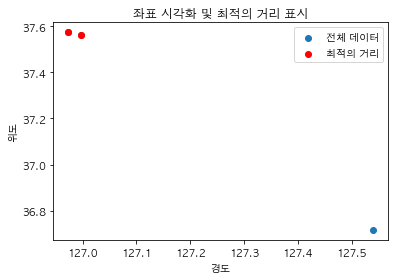

In [6]:
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽기 (파일 이름을 적절히 수정하세요)
file_path = '위경도sample.csv'
data = pd.read_csv(file_path)

# 좌표 간 거리 계산 함수
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# 최적의 거리 계산 함수
def find_optimal_distance(data):
    optimal_distance = float('inf')  # 무한대로 초기화
    optimal_pair = None

    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            coord1 = (data['위도'][i], data['경도'][i])
            coord2 = (data['위도'][j], data['경도'][j])
            distance = calculate_distance(coord1, coord2)

            # 최적의 거리인 경우 업데이트
            if distance < optimal_distance:
                optimal_distance = distance
                optimal_pair = (i + 1, j + 1)  # 1부터 시작하는 행 번호로 표시

    return optimal_pair, optimal_distance

# 최적의 거리 찾기
optimal_pair, optimal_distance = find_optimal_distance(data)

# 결과 출력
print(f"최적의 거리를 가진 행 쌍: {optimal_pair}")
print(f"최적의 거리: {optimal_distance} 킬로미터")

# 최적의 거리 두 지점의 점포명 표시
store_name1 = data['점포명'][optimal_pair[0] - 1]
store_name2 = data['점포명'][optimal_pair[1] - 1]
print(f"최적의 거리를 가진 두 지점의 점포명: {store_name1}, {store_name2}")

# 시각화
coord1 = (data['위도'][optimal_pair[0] - 1], data['경도'][optimal_pair[0] - 1])
coord2 = (data['위도'][optimal_pair[1] - 1], data['경도'][optimal_pair[1] - 1])

plt.scatter(data['경도'], data['위도'], label='전체 데이터')
plt.scatter([coord1[1], coord2[1]], [coord1[0], coord2[0]], color='red', label='최적의 거리')
plt.xlabel('경도')
plt.ylabel('위도')
plt.title('좌표 시각화 및 최적의 거리 표시')
plt.legend()
plt.show()


## 지도에 표시하고 저장 (직선 거리 표시) ##

In [4]:
import pandas as pd
from geopy.distance import geodesic
import folium

# CSV 파일에서 데이터 읽기 (파일 이름을 적절히 수정하세요)
file_path = '위경도sample.csv'
data = pd.read_csv(file_path)

# 좌표 간 거리 계산 함수
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# 최적의 거리 계산 함수
def find_optimal_distance(data):
    optimal_distance = float('inf')  # 무한대로 초기화
    optimal_pair = None

    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            coord1 = (data['위도'][i], data['경도'][i])
            coord2 = (data['위도'][j], data['경도'][j])
            distance = calculate_distance(coord1, coord2)

            # 최적의 거리인 경우 업데이트
            if distance < optimal_distance:
                optimal_distance = distance
                optimal_pair = (i + 1, j + 1)  # 1부터 시작하는 행 번호로 표시

    return optimal_pair, optimal_distance

# 최적의 거리 찾기
optimal_pair, optimal_distance = find_optimal_distance(data)

# 최적의 거리 두 지점의 좌표 및 점포명
coord1 = (data['위도'][optimal_pair[0] - 1], data['경도'][optimal_pair[0] - 1])
coord2 = (data['위도'][optimal_pair[1] - 1], data['경도'][optimal_pair[1] - 1])
store_name1 = data['점포명'][optimal_pair[0] - 1]
store_name2 = data['점포명'][optimal_pair[1] - 1]

# 지도 생성
m = folium.Map(location=[(coord1[0] + coord2[0]) / 2, (coord1[1] + coord2[1]) / 2], zoom_start=10)

# 최적의 거리 두 지점에 마커 추가
folium.Marker(location=[coord1[0], coord1[1]], popup=store_name1).add_to(m)
folium.Marker(location=[coord2[0], coord2[1]], popup=store_name2).add_to(m)

# 최적의 거리를 나타내는 선 추가
folium.PolyLine([coord1, coord2], color='red', weight=2.5, opacity=1).add_to(m)

# 지도를 HTML 파일로 저장
m.save('map_직선 거리 표시.html')

## 모든 점들의 지도 표시와 중앙에 거리 계산 ##

In [3]:
import pandas as pd
from geopy.distance import geodesic
import folium

# CSV 파일에서 데이터 읽기 (파일 이름을 적절히 수정하세요)
file_path = '위경도sample.csv'
data = pd.read_csv(file_path)

# 좌표 간 거리 계산 함수
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# 전체 점들의 거리 합산 함수
def calculate_total_distance(data):
    total_distance = 0

    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            coord1 = (data['위도'][i], data['경도'][i])
            coord2 = (data['위도'][j], data['경도'][j])
            distance = calculate_distance(coord1, coord2)
            total_distance += distance

    return total_distance

# 전체 점들의 거리 합산 계산
total_distance = calculate_total_distance(data)

# 지도 생성
m = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=10)

# 전체 점에 마커 추가
for i, row in data.iterrows():
    folium.Marker(location=[row['위도'], row['경도']], popup=row['점포명']).add_to(m)

# 전체 점들의 거리 합산을 지도에 표시
folium.Marker(location=[data['위도'].mean(), data['경도'].mean()],
              popup=f'Total Distance: {total_distance:.2f} km',
              icon=folium.Icon(color='red')).add_to(m)

# 지도를 HTML 파일로 저장
m.save('map_total_거리.html')

## 모든 점들의 지도 표시와 중앙에 거리 계산 (직선 거리 표시) ##

In [2]:
import pandas as pd
from geopy.distance import geodesic
import folium

# CSV 파일에서 데이터 읽기 (파일 이름을 적절히 수정하세요)
file_path = '위경도sample.csv'
data = pd.read_csv(file_path)

# 좌표 간 거리 계산 함수
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# 전체 점들의 거리 합산 함수
def calculate_total_distance(data):
    total_distance = 0

    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            coord1 = (data['위도'][i], data['경도'][i])
            coord2 = (data['위도'][j], data['경도'][j])
            distance = calculate_distance(coord1, coord2)
            total_distance += distance

    return total_distance

# 전체 점들의 거리 합산 계산
total_distance = calculate_total_distance(data)

# 지도 생성
m = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=10)

# 전체 점에 마커 추가
for i, row in data.iterrows():
    folium.Marker(location=[row['위도'], row['경도']], popup=row['점포명']).add_to(m)

# 전체 점들을 선으로 연결
for i in range(len(data) - 1):
    coord1 = (data['위도'][i], data['경도'][i])
    coord2 = (data['위도'][i + 1], data['경도'][i + 1])
    folium.PolyLine([coord1, coord2], color='blue').add_to(m)

# 마지막 점과 첫 번째 점을 선으로 연결
coord1 = (data['위도'].iloc[-1], data['경도'].iloc[-1])
coord2 = (data['위도'].iloc[0], data['경도'].iloc[0])
folium.PolyLine([coord1, coord2], color='blue').add_to(m)

# 전체 점들의 거리 합산을 지도에 표시
folium.Marker(location=[data['위도'].mean(), data['경도'].mean()],
              popup=f'Total Distance: {total_distance:.2f} km',
              icon=folium.Icon(color='red')).add_to(m)

# 지도를 HTML 파일로 저장
m.save('map_total_line거리.html')
